In [1]:
import pandas as pd
import numpy as np

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 7.1 Handling Missing Data

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

**isnull()**

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

**NA means Not available, In python we None is also treated as NA**

In [4]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

NA handling methods:
* dropna
* fillna
* isnull
* notnull

##### Filtering Out Missing Data

In [5]:
# dropna
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [6]:
# dropna is equivalent to 
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [7]:
# drop rows if any element is None
data = pd.DataFrame([[1., 6.5, 3.],
                    [1., NA, NA],
                    [NA, 6.5, 3.],
                    [NA, NA, NA]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,6.5,3.0
3,NaN,NaN,NaN


In [8]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [9]:
# droping rows only when all values are NA
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,6.5,3.0


In [10]:
# to drop columns
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,6.5,3.0,NaN
3,NaN,NaN,NaN,NaN


In [11]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,6.5,3.0
3,NaN,NaN,NaN


**dropna()** with threshold

In [12]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,0.223511,NaN,NaN
1,1.800797,NaN,NaN
2,0.977685,NaN,-0.291604
3,-0.033339,NaN,0.108141
4,-1.297970,0.131774,2.551592
5,0.337040,1.180183,2.882714
6,1.244459,1.741617,-0.564799


In [13]:
# without threshold
df.dropna()

,0,1,2
4,-1.297970,0.131774,2.551592
5,0.337040,1.180183,2.882714
6,1.244459,1.741617,-0.564799


In [14]:
# with threshold 
df.dropna(thresh=2)

,0,1,2
2,0.977685,NaN,-0.291604
3,-0.033339,NaN,0.108141
4,-1.297970,0.131774,2.551592
5,0.337040,1.180183,2.882714
6,1.244459,1.741617,-0.564799


##### Filling In Missing Data

In [15]:
# fillna
df.fillna(0)

,0,1,2
0,0.223511,0.000000,0.000000
1,1.800797,0.000000,0.000000
2,0.977685,0.000000,-0.291604
3,-0.033339,0.000000,0.108141
4,-1.297970,0.131774,2.551592
5,0.337040,1.180183,2.882714
6,1.244459,1.741617,-0.564799


In [16]:
# fillna with dict
df.fillna({1: 1, 2:2})

,0,1,2
0,0.223511,1.000000,2.000000
1,1.800797,1.000000,2.000000
2,0.977685,1.000000,-0.291604
3,-0.033339,1.000000,0.108141
4,-1.297970,0.131774,2.551592
5,0.337040,1.180183,2.882714
6,1.244459,1.741617,-0.564799


In [17]:
# fillna with inplace
df.fillna(0, inplace=True)
df

,0,1,2
0,0.223511,0.000000,0.000000
1,1.800797,0.000000,0.000000
2,0.977685,0.000000,-0.291604
3,-0.033339,0.000000,0.108141
4,-1.297970,0.131774,2.551592
5,0.337040,1.180183,2.882714
6,1.244459,1.741617,-0.564799


In [18]:
# fillna with forward fill
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.316099,1.697114,-0.052033
1,-0.384714,0.304282,1.366405
2,-0.017674,NaN,0.282812
3,-0.340999,NaN,1.031282
4,-1.191603,NaN,NaN
5,1.151103,NaN,NaN


In [19]:
df.fillna(method='ffill')

,0,1,2
0,0.316099,1.697114,-0.052033
1,-0.384714,0.304282,1.366405
2,-0.017674,0.304282,0.282812
3,-0.340999,0.304282,1.031282
4,-1.191603,0.304282,1.031282
5,1.151103,0.304282,1.031282


In [20]:
# fill method with limit
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.316099,1.697114,-0.052033
1,-0.384714,0.304282,1.366405
2,-0.017674,0.304282,0.282812
3,-0.340999,0.304282,1.031282
4,-1.191603,NaN,1.031282
5,1.151103,NaN,1.031282


Other ways like fill with mean/median values:

In [21]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

#### 7.2 Data Transformation

##### Removing Duplicates 

In [22]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1, 1, 2, 3, 3, 4, 4]})

In [23]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


**duplicated()**

In [24]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

**drop_duplicates()**

In [25]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [26]:
# for specific columns
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [27]:
# by default 1st occurance is preserved
# we can modify the same using keep option
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


##### Transforming Data Using a Function or Mapping

In [28]:
#example
data = pd.DataFrame({
    'Food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]
})
data

,Food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [33]:
# we need to add a column based on mapping
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}


In [30]:
# convert to lower case
lowercased = data['Food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: Food, dtype: object

In [34]:
data['animal'] = lowercased.map(meat_to_animal)
data

,Food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [35]:
# alternatively we can pass a function
data['Food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: Food, dtype: object

##### Replacing Values

In [36]:
data = pd.Series([1., -999., 2., -999., -1000, 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [37]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [38]:
# replacing multiple values
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [39]:
# using different replacement for different values
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [40]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

##### Renaming Axis Indexes

In [41]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                   index=['Ohio', 'Colorado', 'New York'],
                   columns=['one', 'two', 'three', 'four'])

In [42]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [43]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [44]:
# without modifying the original object
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [45]:
# using dict
data.rename(index={'OHIO': 'INDIANA'},
           columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [46]:
# with inplace
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [47]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


##### Discretization and Binning 

In [88]:
# creating bins
ages = [18, 20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 100]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats # categorical object

[NaN, (18.0, 25.0], (18.0, 25.0], (18.0, 25.0], (25.0, 35.0], ..., (60, 100], (35, 60], (35, 60], (25, 35], (60, 100]]
Length: 14
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [89]:
# list categories
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [90]:
# categories index
cats.codes

array([-1,  0,  0,  0,  1,  0,  0,  2,  1,  3,  2,  2,  1,  3], dtype=int8)

In [91]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    2
dtype: int64

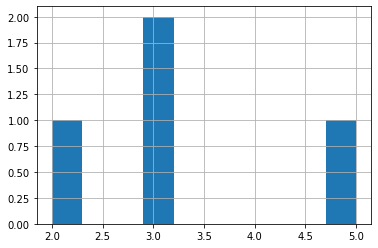

In [92]:
pd.value_counts(cats).hist()

parenthesis means excluded and open<br>
square bracket means inclusive and closed

In [60]:
# to change intervals notation
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [18, 25), [25, 35), [25, 35), ..., [60.0, 100.0), [35.0, 60.0), [35.0, 60.0), [25.0, 35.0), NaN]
Length: 14
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [61]:
# passing custom bins names
group_names = ['Youth', 'YouthAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels = group_names)

[NaN, Youth, Youth, Youth, YouthAdult, ..., Senior, MiddleAged, MiddleAged, YouthAdult, Senior]
Length: 14
Categories (4, object): [Youth < YouthAdult < MiddleAged < Senior]

In [101]:
# if integer is passed instead of bins values, uniformly bins are created
data = np.random.rand(1000)
pd.cut(data, 4, precision=2) # precision to 

[(0.75, 1.0], (0.5, 0.75], (0.25, 0.5], (0.5, 0.75], (-0.00075, 0.25], ..., (0.25, 0.5], (0.5, 0.75], (0.5, 0.75], (0.5, 0.75], (-0.00075, 0.25]]
Length: 1000
Categories (4, interval[float64]): [(-0.00075, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

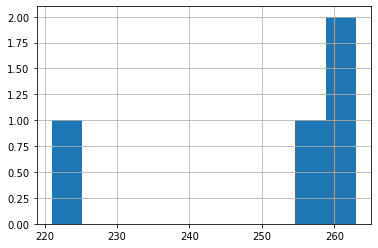

In [102]:
pd.value_counts(pd.cut(data, 4, precision=2)).hist()

qcut, bins the data on sample quantiles

In [103]:
data = np.random.randn(1000) # this will be normally distributed
cats = pd.qcut(data, 4) # no. of quantiles
cats

[(0.0102, 0.671], (-0.628, 0.0102], (0.0102, 0.671], (-0.628, 0.0102], (0.671, 2.968], ..., (-2.9259999999999997, -0.628], (0.671, 2.968], (0.671, 2.968], (0.671, 2.968], (-2.9259999999999997, -0.628]]
Length: 1000
Categories (4, interval[float64]): [(-2.9259999999999997, -0.628] < (-0.628, 0.0102] < (0.0102, 0.671] < (0.671, 2.968]]

In [104]:
pd.value_counts(cats)

(0.671, 2.968]                   250
(0.0102, 0.671]                  250
(-0.628, 0.0102]                 250
(-2.9259999999999997, -0.628]    250
dtype: int64

In [105]:
# using custom quantiles
cats = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])
cats

[(0.0102, 1.332], (-1.212, 0.0102], (0.0102, 1.332], (-1.212, 0.0102], (0.0102, 1.332], ..., (-1.212, 0.0102], (1.332, 2.968], (0.0102, 1.332], (0.0102, 1.332], (-1.212, 0.0102]]
Length: 1000
Categories (4, interval[float64]): [(-2.9259999999999997, -1.212] < (-1.212, 0.0102] < (0.0102, 1.332] < (1.332, 2.968]]

In [106]:
pd.value_counts(cats)

(0.0102, 1.332]                  400
(-1.212, 0.0102]                 400
(1.332, 2.968]                   100
(-2.9259999999999997, -1.212]    100
dtype: int64

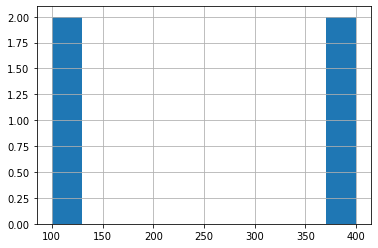

In [108]:
pd.value_counts(cats).hist()

##### Detecting and Filtering Outliers